# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from pickle import dump


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data_c = data[["MedInc","Latitude","Longitude"]]
data_c.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
data_c.shape

(20640, 3)

In [5]:
X_train, X_test = train_test_split(data_c, test_size = 0.2, random_state = 42)
X_train.shape

(16512, 3)

In [6]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [7]:
predicciones=model.labels_
predicciones

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [8]:
X_train["Cluster"]=list(predicciones)
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [9]:
X_train["Cluster"].value_counts()

Cluster
3    4368
5    4356
1    3807
0    2455
2    1280
4     246
Name: count, dtype: int64

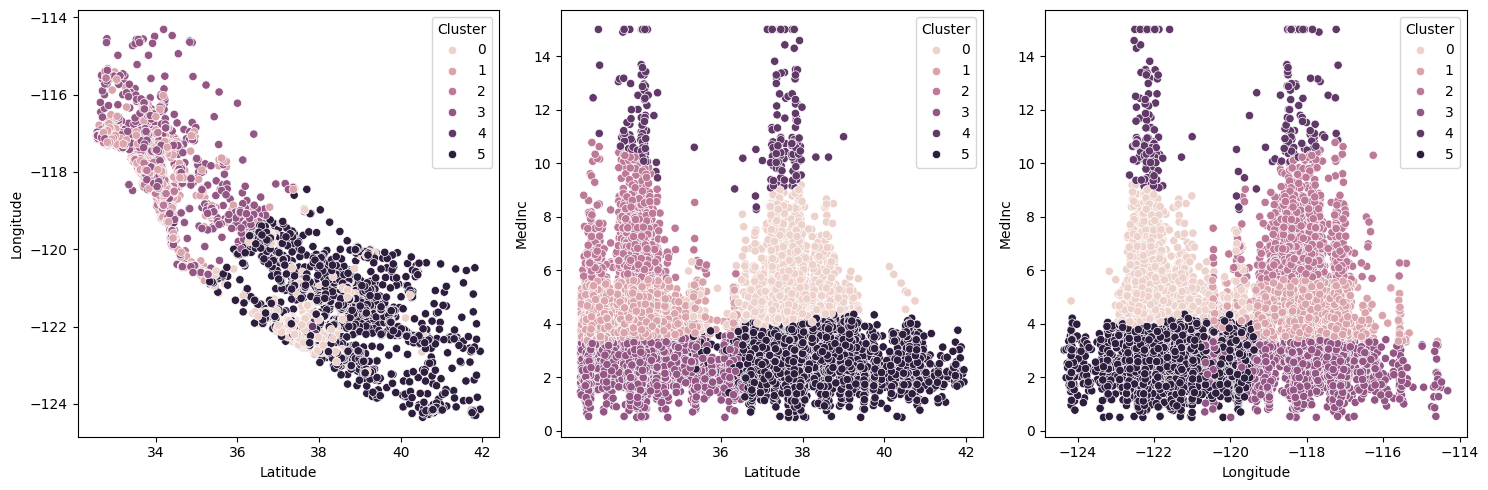

In [10]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster")
plt.tight_layout()
plt.show()

Pareciera que hay dos clusters aun dispersos

In [11]:
model.fit(X_test)
pred_test = model.labels_
pred_test

array([0, 0, 1, ..., 2, 3, 0], shape=(4128,), dtype=int32)

In [12]:
X_test["Cluster"]=list(pred_test)
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,0
3024,2.5313,35.14,-119.46,0
15663,3.4801,37.80,-122.44,1
20484,5.7376,34.28,-118.72,5
9814,3.7250,36.62,-121.93,1


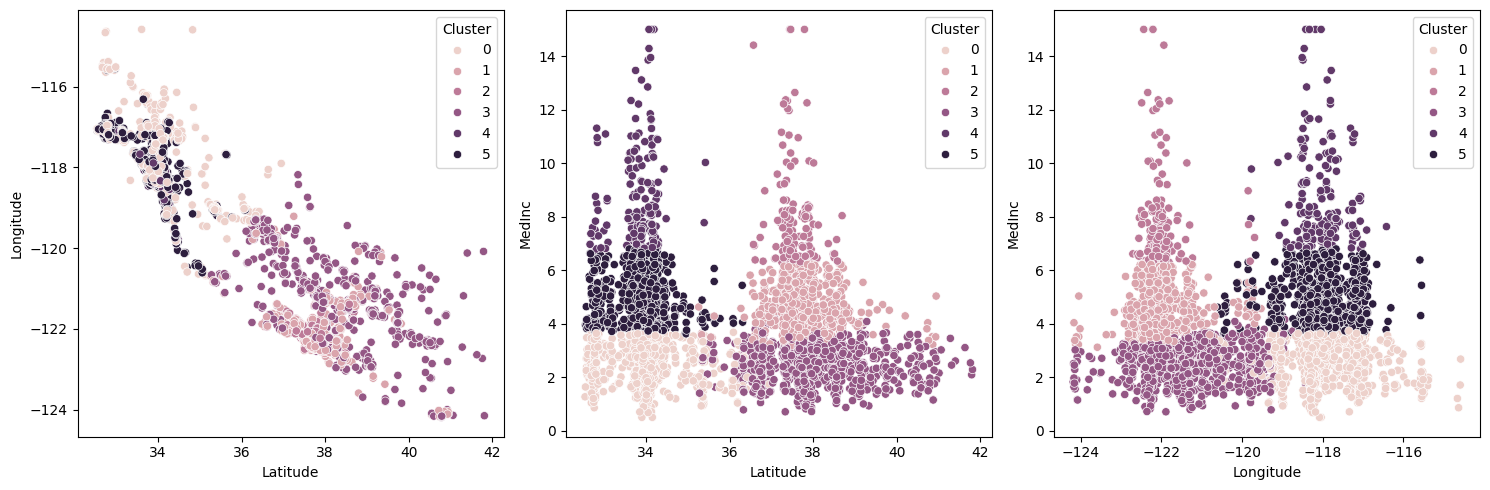

In [13]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster")
plt.tight_layout()
plt.show()

Me parece que la prediccion es satisfactoria

Como modelo alternativo se toma el de arbol de decision porque permite clasificar las casas de acuerdo a ciertas caracteristicas

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelAD = DecisionTreeClassifier(random_state = 42)
modelAD.fit(X_train, predicciones)

DecisionTreeClassifier(random_state=42)

In [15]:
predAD = modelAD.predict(X_test)

In [16]:
accuracy_score(pred_test, predAD)

0.7344961240310077

In [18]:
dump(model, open("../models/k-means_cluster_6_default_42.sav", "wb"))
dump(modelAD, open("../models/decision_tree_classifier_default_42.sav", "wb"))